# Titanic Data set

Source:  
[Predicting the Survival of Titanic Passengers by Niklas Donges](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

## From Raw Data to Predictions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

## Import Data

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.Pclass.unique()

array([3, 1, 2])

In [6]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [7]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

/Users/LukeBarousse/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/LukeBarousse/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  1.,  2.,
         6.,  6., 17., 13., 26., 25., 15., 25., 27., 15., 31., 24., 18.,
        18., 25., 22., 25., 19., 18., 17., 15., 19., 22.,  7., 11., 14.,
        13.,  8., 13.,  5.,  9., 12.,  5.,  9.,  9.,  6., 10.,  7.,  6.,
         1.,  8.,  2.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  2.,  2.,  3.,
         1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.41475,  2.4095 ,  3.40425,  4.399  ,  5.39375,
         6.3885 ,  7.38325,  8.378  ,  9.37275, 10.3675 , 11.36225,
        12.357  , 13.35175, 14.3465 , 15.34125, 16.336  , 17.33075,
        18.3255 , 19.32025, 20.315  , 21.30975, 22.3045 , 23.29925,
        24.294  , 25.28875, 26.2835 , 27.27825, 28.273  , 29.26775,
        30.2625 , 31.25725, 32.252  , 33.24675, 34.2415 , 35.23625,
        36.231  , 37.22575, 38.2205 , 39.21525, 40.21   , 41.20475,
        42.1995 , 43.19425, 44.189  , 45.18375, 46.1785 , 47.17325

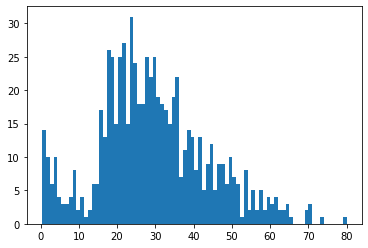

In [8]:
plt.hist(train.Age, bins=80)

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.      ,  10.246584,  20.493168,  30.739752,  40.986336,
         51.23292 ,  61.479504,  71.726088,  81.972672,  92.219256,
        102.46584 , 112.712424, 122.959008, 133.205592, 143.452176,
        153.69876 , 163.945344, 174.191928, 184.438512, 194.685096,
        204.93168 , 215.178264, 225.424848, 235.671432, 245.918016,
        256.1646  , 266.411184, 276.657768, 286.904352, 297.150936,
        307.39752 , 317.644104, 327.890688, 338.137272, 348.383856,
        358.63044 , 368.877024, 379.123608, 389.370192, 399.616776,
        409.86336 , 420.109944, 430.356528, 440.603112, 450.849696,
        461.09628 , 471.342864, 481.589448, 49

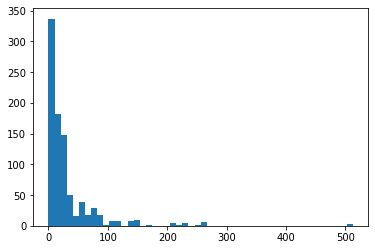

In [9]:
plt.hist(train.Fare, bins=50)

### Analying the survival rate of those without an age

In [10]:
no_age = train[list(train.Age.isnull())]
no_age_survival = sum(no_age.Survived)/len(no_age.Survived)
age = train[list(train.Age.notnull())]
age_survival = sum(age.Survived)/len(age.Survived)
print(f'Survival with no age listed: {no_age_survival} \nSurvival with an age listed: {age_survival}')

Survival with no age listed: 0.2937853107344633 
Survival with an age listed: 0.4061624649859944


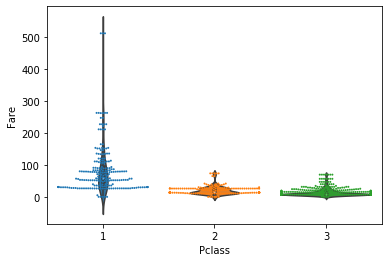

In [11]:
sns.violinplot(x=train.Pclass, y=train.Fare)
sns.swarmplot(x=train.Pclass, y=train.Fare, size=2)

## Preprocess Data

### Convert Cabin to Categorical Data

In [12]:
def cabin_to_cat(data_frame):
    """ Takes the cabin column and extracts the first letter
        This allows the cabin to be used as a category
    """ 
    cabin = data_frame['Cabin'].fillna('')
    data_frame['CabinCat'] = cabin.astype(str).str[0]
    return print(data_frame['CabinCat'].unique())

cabin_to_cat(train)
cabin_to_cat(test)

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
[nan 'B' 'E' 'A' 'C' 'D' 'F' 'G']


### Use Name Prefix to assign Mean Age for Null Values

In [13]:
def name_to_avg_age(data_frame1, data_frame2):
    """Takes the name prefix and assigns and average age to missing values
    """
    #combine both data frames
    data_frame = data_frame1.append(data_frame2, sort=False)
    data_frame.Age = data_frame.Age.astype(float)
    
    #extract the prefix from all names
    data_frame['Initial'] = ''
    for _ in data_frame:
        data_frame['Initial']=data_frame.Name.str.extract('([A-Za-z]+)\.')
    
    #print the prefixes based on gender
    #crosstab = pd.crosstab(data_frame.Sex,data_frame.Initial).T.style.background_gradient(cmap='summer_r')
    
    #Get the average age based on initial
    avg_age = data_frame.groupby('Initial')['Age'].mean().to_dict()

    return avg_age

avg_age_all = name_to_avg_age(train, test)

In [14]:
def fill_na_avg_age(data_frame, avg_age):
    #extract the prefix from all names
    for _ in data_frame:
        data_frame['Initial']=data_frame.Name.str.extract('([A-Za-z]+)\.')
    
    print(f'Missing age values before: {train.Age.isnull().sum()}')
    # assign avg age based on prefix
    for key, value in avg_age.items():
        data_frame.loc[(data_frame.Age.isnull())&(data_frame.Initial==key),'Age']=value
    print(f'Missing age values after: {train.Age.isnull().sum()}')
    return data_frame

train = fill_na_avg_age(train, avg_age_all)
test = fill_na_avg_age(test, avg_age_all)

Missing age values before: 177
Missing age values after: 0
Missing age values before: 0
Missing age values after: 0


### Transform Fare to Logarithmic
Prior to Converting Accuracy was 81% after was still 81%....

(array([ 15.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   5., 219.,  95.,
         38.,  83.,  45.,  37.,  94.,  54.,  32.,  23.,  31.,  33.,  32.,
         11.,  13.,   9.,   5.,  12.,   0.,   0.,   3.]),
 array([0.        , 0.20796558, 0.41593116, 0.62389674, 0.83186232,
        1.0398279 , 1.24779348, 1.45575906, 1.66372464, 1.87169022,
        2.0796558 , 2.28762138, 2.49558695, 2.70355253, 2.91151811,
        3.11948369, 3.32744927, 3.53541485, 3.74338043, 3.95134601,
        4.15931159, 4.36727717, 4.57524275, 4.78320833, 4.99117391,
        5.19913949, 5.40710507, 5.61507065, 5.82303623, 6.03100181,
        6.23896739]),
 <a list of 30 Patch objects>)

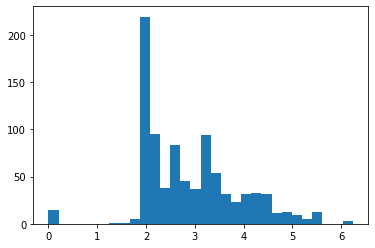

In [15]:
train['FareNorm'] = train.Fare.apply(lambda _: 0 if _ <= 0 else np.log(_))
test['FareNorm'] = test.Fare.apply(lambda _: 0 if _ <= 0 else np.log(_))
plt.hist(train.FareNorm, bins=30)

### Scale Numerical Data

In [16]:
from sklearn.preprocessing import StandardScaler

NUMERICAL = ['Age', 'FareNorm']
scalar = StandardScaler()
train[NUMERICAL] = scalar.fit_transform(train[NUMERICAL])
test[NUMERICAL] = scalar.fit_transform(test[NUMERICAL])

### Get Dummies for Categorical Data

In [17]:
CATEGORY = ['Pclass', 'Sex', 'Embarked', 'CabinCat', 'SibSp', 'Parch', 'Initial']

OTHER_LABELS = [_ for _ in train.columns if _ not in CATEGORY if _ not in NUMERICAL]

X_dummies = pd.get_dummies(train[CATEGORY])
X_dummies_final = pd.get_dummies(test[CATEGORY])

X = X_dummies.join(train[NUMERICAL])

X_final =  X_dummies_final.join(test[NUMERICAL])
X_final.fillna(0, inplace=True)    #fill in Na Values if any exist
# Get missing columns in the training test
missing_cols = set( X.columns ) - set( X_final.columns )
# Add a missing column in test set with default value equal to 0
for _ in missing_cols:
    X_final[_] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_final = X_final[X.columns]

## Split the Data

In [18]:
from sklearn.model_selection import train_test_split

y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## Train the Data

### Testing Models

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

models = [RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier, 
          LinearSVC, GaussianNB, LogisticRegression, SGDClassifier]
names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 
          'LinearSVC', 'GaussianNB', 'LogisticRegression', 'SGDClassifier']
scores = []

for mod in models:
    model = mod()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

results = pd.DataFrame({'Models' : names, 'Scores' : scores}).sort_values(by='Scores', ascending=False).set_index('Models')
print(results)


                          Scores
Models                          
KNeighborsClassifier    0.821229
LogisticRegression      0.821229
RandomForestClassifier  0.810056
LinearSVC               0.810056
SGDClassifier           0.793296
DecisionTreeClassifier  0.782123
GaussianNB              0.715084


/Users/LukeBarousse/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/LukeBarousse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forrest Model
### K-Fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", rf_scores)
print("Mean:", rf_scores.mean())
print("Standard Deviation:", rf_scores.std())

Scores: [0.81944444 0.70833333 0.76388889 0.86111111 0.84507042 0.77464789
 0.76056338 0.83098592 0.82857143 0.85714286]
Mean: 0.8049759669125865
Standard Deviation: 0.0477942686613566


### Feature Importance

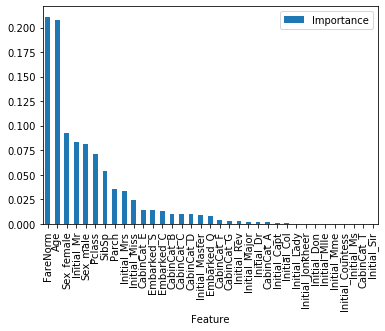

In [21]:
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances.plot.bar()

### Tuning Hyperparameters

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
               "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
               "n_estimators": [100, 400, 700, 1000, 1500]}

rf = RandomForestClassifier() #n_estimators=100, max_features='auto', oob_score=True, random_state=RANDOM_STATE, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_score = accuracy_score(y_test, y_pred)
print(f'Score of tuned hyperparameter model: {clf_score}')

/Users/LukeBarousse/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score of tuned hyperparameter model: 0.8324022346368715


### Fitting Final Model and Printing Results

In [23]:
clf.fit(X, y)
predictions = clf.predict(X_final)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)
print('Saved file: ' + filename)



/Users/LukeBarousse/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Saved file: Titanic Predictions 1.csv
